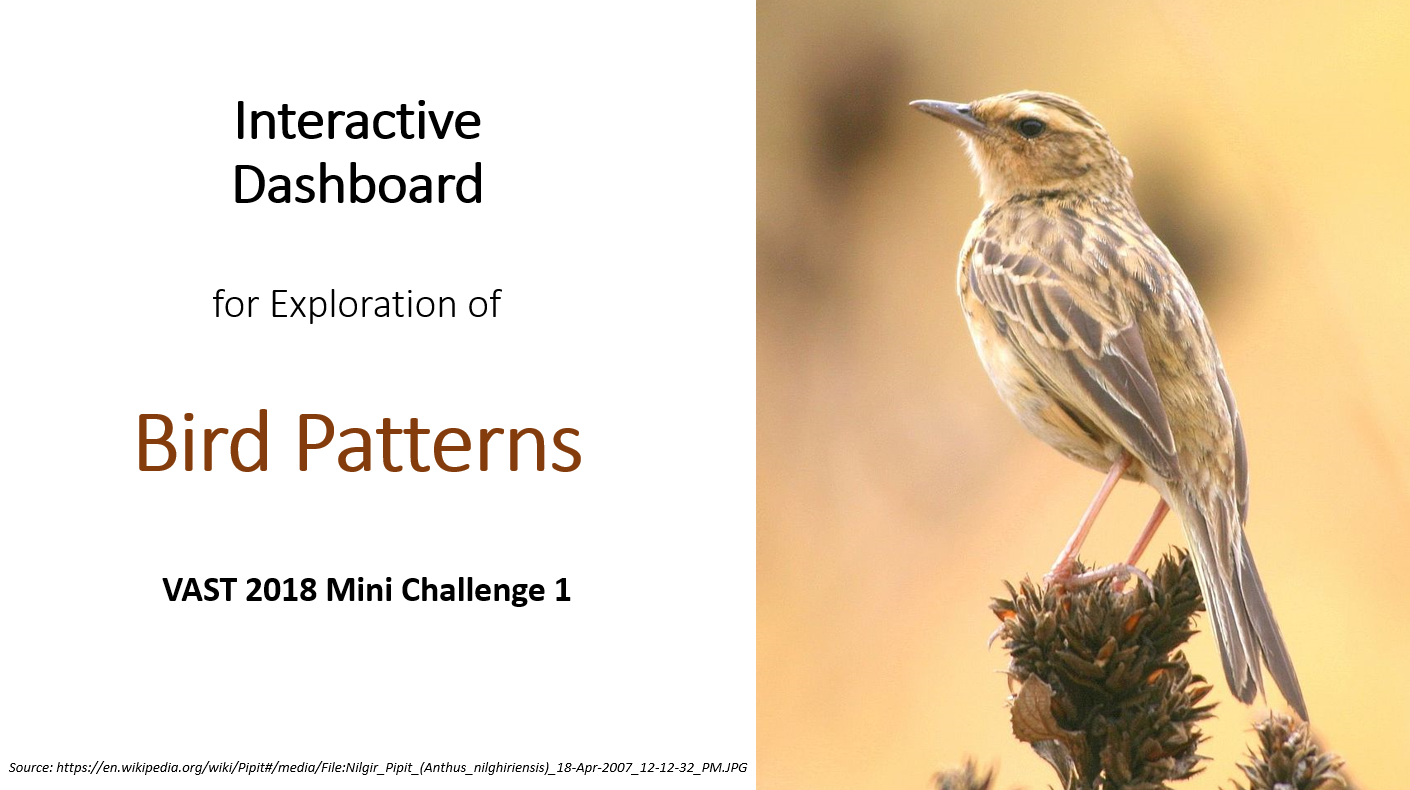

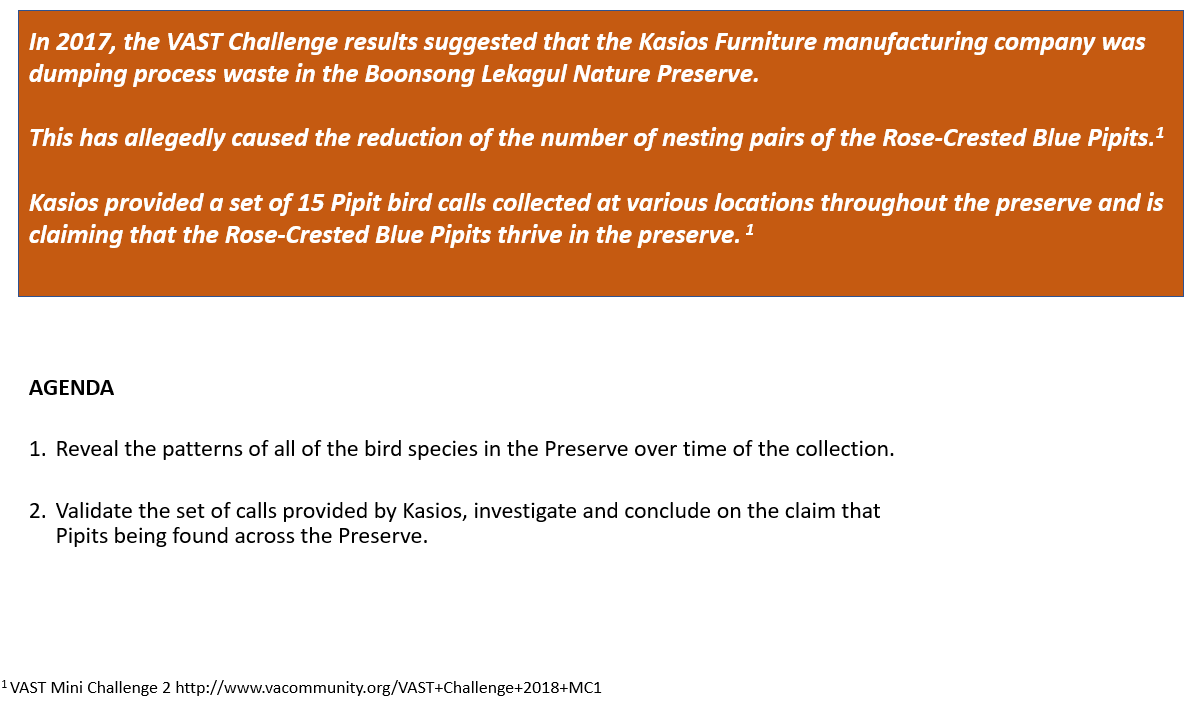

# COLLECTION OVERVIEW

## Record count by bird type




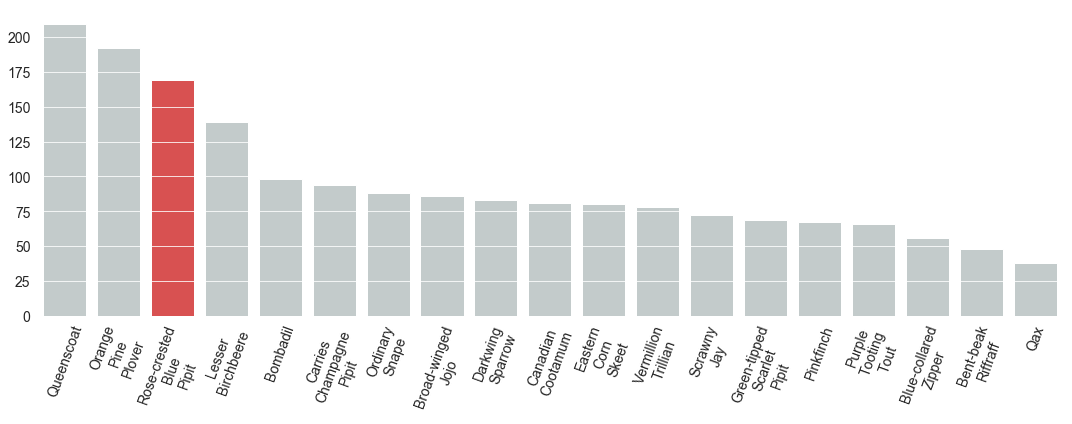

In [16]:
plot_countbytype(data)


<br>
-  Rose Crested Blue Pipits are the third most popular bird species in the Preserve
<br>
<br>
<br>





## Record count by time of day and bird type

In [17]:
draw_counttod   

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnQmlyZF9UeXBlJywgb3B0aW9ucz1PcmRlcmVkRGljdChbKCdCZW50LWJlYWsgUmlmZnJhZmYnLCAnQmVudC1iZWHigKY=


<br>
-  Rose Crested Blue Pipits call and sing in the morning and mostly call during the day
<br>
<br>
-  Bent-beak Riffraff only sing and only in the mornings
<br>
<br>
-  Blue-collared Zipper mostly calls and most of the time during the day
<br>
<br>
-  The call and song patters by time of day vary for different bird species
<br>
<br>
<br>



## Record count by year and bird type

In [18]:
draw_count_year

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnQmlyZF9UeXBlJywgb3B0aW9ucz1PcmRlcmVkRGljdChbKCdCZW50LWJlYWsgUmlmZnJhZmYnLCAnQmVudC1iZWHigKY=


<br>
-  Majority of recordings in the collection are from the period between 2013 to 2017
<br>
<br>
-  This is consistent for most bird species, including Rose-crested Blue Pipits
<br>
<br>
-  The different patterns, mostly declining number of records can be seen for sich bird species as: Scrawney Jay and Bent-beak Riffraff
<br>
<br>
-  Blue-collard Zipper has not records in 2015
<br>
<br>
<br>

# PATTERNS OVER TIME

In [19]:
graph_pattern_time 

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnUGxvdDF0eXBlJywgb3B0aW9ucz17J0JvdGgnOiAnY2FsbCBhbmQgc29uZycsICdDYWxscyc6ICdjYWxsJywgJ1PigKY=


<br>
-  In 2013 most of the Rose-crested Blue Pipit songs and calls were around the Kasis dumping site.
<br>
<br>
-  By 2015 Rose-crested Blue Pipit moved south of the dumping site, the number of calls and songs were higher than in previous years.
<br>
<br>
-  By 2017 a declining number of Rose-crested Blue Pipit were still calling in the Preserve. The location moved even more south of the dumping site. However, there were a significantly less records of Rose-crested Blue Pipit sining in the Preserve.
<br>
<br>
-  Queenscoat, the most popular bird species in the Preserve, have not changed their location of habitation.
<br>
<br>
-  This pattern suggests that population of Rose-crested Blue Pipit is declining in the preserve. 
<br>
<br>
<br>

# TEST CALLS LOCATIONS

In [20]:
draw_test_map

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnQ2FsbHMnLCBvcHRpb25zPU9yZGVyZWREaWN0KFsoJ1Rlc3QgMScsIDApLCAoJ1Rlc3QgMicsIDEpLCAoJ1Rlc3TigKY=


<br>
-  Majority of test call locations are outside usual area of Rose-crested Blue Pipits habitation.
<br>
<br>
-  Only the recordings 1, 6 and 11 are likely to be Rose-crested Blue Pipits. 
<br>
<br>
-  The records 10, 12, 13 were recorded at locations where Rose-crested Blue Pipits was never spotted before. 
<br>
<br>
-  As a result, it is not likely to be the Rose-crested Blue Pipits.
<br>
<br>
<br>

# TEST AUDIO ANALYSIS 

In [21]:
draw_test_analytic 

aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnQ2FsbHMnLCBvcHRpb25zPU9yZGVyZWREaWN0KFsoJ1Rlc3QgMScsIDApLCAoJ1Rlc3QgMicsIDEpLCAoJ1Rlc3TigKY=


<br>
-  Test 1 and 6 looks like Rose-crested Blue Pipits (but with lots of background noise)
<br>
<br>
-  Based on waveplot, location and spectorgram, the Test 3 and 4 resemble Bombadil species
<br>
<br>
-  Test 7 is very distinct waveplot and spectogram which does not resemble Rose-crested Blue Pipit.
<br>
<br>
-  Test 14 resembles Carries Champagne Pipit
<br>
<br>
-  Most of the audio files and locations of the test records are not consistent and do not resemble the Rose-crested Blue Pipits
<br>
<br>
<br>

# CONCLUSION

<br>
<br>

It would be useful to know the time of day recording was taken, as many types of bird sing and call at different times of day. 
<br>
<br>
Visualisation can be improved by utilising the t-SNE Feature Reduction algorithm t visualise the song of different bird species on 2D feature space.
<br>
<br>
Run neural networks to classify the test audio files on the preprocessed audio files.

<br>

<br>


# CODE

In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import os
import csv
import matplotlib.pyplot as plt
import imageio
from datetime import datetime
import seaborn as sns
sns.set_style("whitegrid",{'axes.axisbelow': False,\
                           'grid.color': 'w','axes.spines.bottom': False, \
                           'axes.spines.left': False, 'axes.spines.right': False,
 'axes.spines.top': False})
from ipywidgets import interact, interactive, fixed

In [2]:
#All data Locations
data=pd.read_csv(r"data/all_birds_cleaned.csv",index_col=0)
data["birdname"]=["\n".join(name.split(" ")) for name in data["English_name"]]
#Test Audio
with open(r"data\test_songs.csv") as f:
    test=csv.reader(f)
    test=list(test)
test=np.array(test,dtype=np.float32)

#Test calls locations
testloc=pd.read_csv(r"data\Test Birds Location.csv",index_col="ID")

#Bird types calls examples audio
with open(r"data\birdtypes_calls.csv") as fi:
    birdtypes_calls=csv.reader(fi)
    birdtypes_calls=list(birdtypes_calls)
birdtypes_calls=np.array(birdtypes_calls,dtype=np.float32)

#names of types
with open(r"data\typetowaveplot.csv") as fi:
    typetowaveplot=csv.reader(fi)
    typetowaveplot=list(typetowaveplot)[0]

In [3]:
def plot_countbytype(data):
    plt.figure(figsize=(15,6))
    clrs = ["#EE3B3B" if (x == 'Rose-crested Blue Pipit') else \
            "#C1CDCD" for x in data['English_name'].value_counts().index.tolist()]
    sns.countplot(data=data,x="birdname",order = data['birdname'].value_counts().index,palette=clrs)
    plt.xticks(rotation=70,fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel("")
    plt.xlabel("")
#     plt.title("Record count by bird type",fontsize=14)
    plt.tight_layout()
    plt.show()

In [4]:
def plot_counttod(Bird_Type):
    plt.figure(figsize=(15,8))
    size = 14
    color={"call":"#6E8B3D","song":"#EE3B3B","other":"grey"}

    plotdata=data[data["English_name"]==Bird_Type]
    ax1=plt.subplot(2,1,1)
    sns.countplot(data=plotdata,x="TOD",hue="type",order=["Morning","Day","Evening","Night"],palette=color)
    plt.title(Bird_Type,fontsize=size+1)
    plt.xlabel("")
    plt.xticks(fontsize= size-1)
    plt.ylabel("")

    plt.legend(loc="upper right",frameon=False,prop={'size': size})

    ax2=plt.subplot(2,1,2)
    sns.countplot(data=data,x="TOD",hue="type",order=["Morning","Day","Evening","Night"],alpha=0.5,palette=color)
    plt.title("All birds",fontsize=size+1)
    plt.xlabel("")
    plt.xticks(fontsize= size-1)
    plt.ylabel("")

    plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.6, wspace=None, hspace=0.8)
    plt.legend(loc="upper right",frameon=False,prop={'size': size})
    ax2.get_legend().remove()
    plt.show()

In [5]:
from collections import OrderedDict
n2=data["English_name"].unique().tolist()
n2=sorted(n2)
dictype2=OrderedDict()
for i in range(len(n2)):
    dictype2[n2[i]]=n2[i]

draw_counttod=interactive(plot_counttod,Bird_Type=dictype2)

In [6]:
def plot_count_year(Bird_Type):  
    plt.figure(figsize=(18,15))
    size = 14
    plt.subplot(2,1,1)
    clrs = ["#6E8B3D" if (x==2013) or x==2014 or x==2015 or\
            x==2016 or x==2017 else "#C1CDCD" for x in sorted(data['year'].unique().tolist())]
    plotdata=data[data["English_name"]==Bird_Type]
    sns.countplot(data=plotdata,x="year",palette=clrs,order=sorted(data['year'].unique().tolist()))
    plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
    plt.xlabel("")
    plt.ylabel("")
    plt.yticks(fontsize=size)
    plt.xticks(fontsize=size)
    plt.title("%s" %Bird_Type,fontsize=size+3)

    plt.subplot(2,1,2)
    clrs = ["#EE3B3B" if (x==2013) or x==2014 or x==2015 or x==2016 or x==2017\
            else "#C1CDCD" for x in sorted(data['year'].unique().tolist())]
    sns.countplot(data=data,x="year",palette=clrs,alpha=0.4,order=sorted(data['year'].unique().tolist()))
    plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
    plt.xlabel("")
    plt.ylabel("")
    plt.yticks(fontsize=size)
    plt.xticks(fontsize=size)
    plt.title("All birds",fontsize=size+3)

    plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.6, wspace=None, hspace=0.8)
    plt.show()

In [7]:
from collections import OrderedDict
n2=data["English_name"].unique().tolist()
n2=sorted(n2)
dictype2=OrderedDict()
for i in range(len(n2)):
    dictype2[n2[i]]=n2[i]

draw_count_year=interactive(plot_count_year,Bird_Type=dictype2)

In [8]:
def plot_pattern_time(Plot1type,Plot1bird,Plot2type,Plot2bird):

    im=imageio.imread(r"data\Lekagul Roadways 2018.jpg")
    #PLOT PARAM
    ftsize=16
    from matplotlib.ticker import MaxNLocator

    fig=plt.figure(figsize=(20,8))
    grid=plt.GridSpec(2,5,wspace=0.4,hspace=0.3)
    #Convert image to B&W
    im_bw0=np.dot(im[...,:3],[0.299,0.587,0.114])

    #Filter
    years=[2013,2014,2015,2016,2017]
    years1=[2013,2014,2015,2016,2017]

    #PLOT1
    if Plot1type!="call and song":
        for j in range(len(years)):
            im_bw=im_bw0>95
            plotdata=data[(data["English_name"]==Plot1bird)&(data["year"]==years[j])& (data["type"]==Plot1type)]

            if plotdata.shape[0]>3:
                x=plotdata["X"].tolist()
                y=plotdata["Y"].tolist()

                plt.subplot(grid[0,j])
                plt.imshow(im_bw,cmap=plt.cm.gray)
                plt.plot(148,159,marker="X",markersize=40,alpha=0.8,color="#515151")
                plt.gca().invert_yaxis()

                sns.kdeplot(x, y, n_levels=30, cmap="Greens",label="Density plot")

                plt.axis("off")
                plt.title(years[j],fontweight="bold",fontsize=ftsize)

            else:
                plt.subplot(grid[0,j])
                plt.imshow(im_bw,cmap=plt.cm.gray)
                plt.annotate("Insufficient data",xytext=(20,60),xy=(1,1),fontsize=14)
                plt.title(years1[j],fontweight="bold",fontsize=ftsize)
                plt.axis("off")

        main=fig.add_subplot(grid[1,:])
        main.yaxis.set_major_locator(MaxNLocator(integer=True))

        plotdata3=data[(data["English_name"]==Plot1bird)&(data["year"].isin(years))& (data["type"]==Plot1type)]
        if plotdata3.shape[0]>3:
            sns.countplot(data=plotdata3,x="year",color="#C1CDCD",alpha=0.9)
            plt.yticks(fontsize=ftsize)
            plt.ylabel("")
            plt.xticks(fontsize=ftsize)
            plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
            plt.xlabel("")
        else:
            plt.axis("off")
            main.annotate("Insufficient data",xytext=(0.5,1),xy=(0,1),fontsize=16)
    else:
        for j in range(len(years)):
            im_bw=im_bw0>95
            plotdata=data[(data["English_name"]==Plot1bird)&(data["year"]==years[j])]

            if plotdata.shape[0]>3:
                x=plotdata["X"].tolist()
                y=plotdata["Y"].tolist()

                plt.subplot(grid[0,j])
                plt.imshow(im_bw,cmap=plt.cm.gray)
                plt.plot(148,159,marker="X",markersize=40,alpha=0.8,color="#515151")
                plt.gca().invert_yaxis()

                sns.kdeplot(x, y, n_levels=30, cmap="Greens",label="Density plot")

                plt.axis("off")
                plt.title(years[j],fontweight="bold",fontsize=ftsize)

            else:
                plt.subplot(grid[0,j])
                plt.imshow(im_bw,cmap=plt.cm.gray)
                plt.annotate("Insufficient data",xytext=(20,60),xy=(0,0),fontsize=ftsize)
                plt.title(years1[j],fontweight="bold",fontsize=ftsize)
                plt.axis("off")

        main=fig.add_subplot(grid[1,:])
        main.yaxis.set_major_locator(MaxNLocator(integer=True))

        plotdata3=data[(data["English_name"]==Plot1bird)&(data["year"].isin(years))]
        if plotdata3.shape[0]>3:
            sns.countplot(data=plotdata3,x="year",color="#C1CDCD",alpha=0.9)
            plt.ylabel("")
            plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
            plt.yticks(fontsize=ftsize)
            plt.xticks(fontsize=ftsize)
            plt.xlabel("")
        else:
            plt.axis("off")
            main.annotate("Insufficient data",xytext=(0.5,1),xy=(0,1),fontsize=ftsize)
        
    plt.suptitle("%s - %s" %(Plot1bird,Plot1type),x=0.5,y=0.95,fontsize=ftsize+2,fontweight="bold")
    plt.show()

    #PLOT 2
    fig=plt.figure(figsize=(20,8))
    grid=plt.GridSpec(2,5,wspace=0.4,hspace=0.3)

    if Plot2type!="call and song":

        for i in range(len(years1)):

            im_bw1=im_bw0>95
            plotdata1=data[(data["English_name"]==Plot2bird)&(data["year"]==years1[i])& (data["type"]==Plot2type)]

            if plotdata1.shape[0]>3:
                x1=plotdata1["X"].tolist()
                y1=plotdata1["Y"].tolist()

                plt.subplot(grid[0,i])
                plt.imshow(im_bw1,cmap=plt.cm.gray)
                plt.plot(148,159,marker="X",markersize=40,alpha=0.8,color="#515151")
                plt.gca().invert_yaxis()

                sns.kdeplot(x1, y1, n_levels=30, cmap="Greens",label="Density plot")

                plt.axis("off")
                plt.title(years1[i],fontweight="bold",fontsize=ftsize)

            else:

                plt.subplot(grid[0,i])
                plt.imshow(im_bw1,cmap=plt.cm.gray)
                plt.annotate("Insufficient data",xytext=(20,60),xy=(1,1),fontsize=ftsize)
                plt.title(years1[i],fontweight="bold",fontsize=ftsize)
                plt.axis("off")

        main=fig.add_subplot(grid[1,:])
        main.yaxis.set_major_locator(MaxNLocator(integer=True))

        plotdata3=data[(data["English_name"]==Plot2bird)&(data["year"].isin(years))& (data["type"]==Plot2type)]
        if plotdata3.shape[0]>3:
            sns.countplot(data=plotdata3,x="year",color="#C1CDCD",alpha=0.9)
            plt.ylabel("")
            plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
            plt.yticks(fontsize=ftsize)
            plt.xticks(fontsize=ftsize)
            plt.xlabel("")   
        else:
            plt.axis("off")
            main.annotate("Insufficient data",xytext=(0.5,1),xy=(0,1),fontsize=ftsize)

    else:
        for i in range(len(years1)):
            im_bw1=im_bw0>95
            plotdata1=data[(data["English_name"]==Plot2bird)&(data["year"]==years1[i])]

            if plotdata1.shape[0]>3:

                x1=plotdata1["X"].tolist()
                y1=plotdata1["Y"].tolist()

                plt.subplot(grid[0,i])
                plt.imshow(im_bw1,cmap=plt.cm.gray)
                plt.plot(148,159,marker="X",markersize=40,alpha=0.8,color="#515151")
                plt.gca().invert_yaxis()

                sns.kdeplot(x1, y1, n_levels=30, cmap="Greens",label="Density plot")

                plt.axis("off")
                plt.title(years1[i],fontweight="bold",fontsize=ftsize) 

            else:

                plt.subplot(grid[0,i])
                plt.imshow(im_bw1,cmap=plt.cm.gray)
                plt.annotate("Insufficient data",xytext=(20,60),xy=(1,1),fontsize=ftsize)
                plt.title(years1[i],fontweight="bold",fontsize=ftsize)
                plt.axis("off")


        main=fig.add_subplot(grid[1,:])
        main.yaxis.set_major_locator(MaxNLocator(integer=True))
        
        plotdata3=data[(data["English_name"]==Plot2bird)&(data["year"].isin(years))]
        if plotdata3.shape[0]>3:
            sns.countplot(data=plotdata3,x="year",color="#C1CDCD",alpha=0.9)
            plt.ylabel("")
            plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
            plt.yticks(fontsize=ftsize)
            plt.xticks(fontsize=ftsize)
            plt.xlabel("")      
        else:
            plt.axis("off")
            main.annotate("Insufficient data",xytext=(0.5,1),xy=(0,1),fontsize=ftsize)
            

    plt.suptitle("%s - %s" %(Plot2bird,Plot2type),x=0.5,y=0.95,fontsize=ftsize,fontweight="bold")
    plt.show()

In [9]:
from collections import OrderedDict
n2=data["English_name"].unique().tolist()
n2=sorted(n2)
dictype2=OrderedDict()
for i in range(len(n2)):
    dictype2[n2[i]]=n2[i]
    
pt={"Songs":"song","Calls":"call","Both":"call and song"}
    
graph_pattern_time=interactive(plot_pattern_time,Plot1type=pt,Plot1bird=dictype2,Plot2type=pt,Plot2bird=dictype2)

In [10]:
def plot_test_map(Calls,Bird_Type):    
    im=imageio.imread(r"data\Lekagul Roadways 2018.jpg")
    plt.figure(figsize=(10,10))

    #Convert image to B&W
    im_bw=np.dot(im[...,:3],[0.299,0.587,0.114])

    #Filter
    im_bw=im_bw>95

    plt.imshow(im_bw,cmap=plt.cm.gray,alpha=0.3)
    a=plt.plot(148,159,marker="X",markersize=40,alpha=0.8,color="#515151")

    plt.gca().invert_yaxis()

    year=[2017,2018]

    plotdata=data[(data["English_name"]==Bird_Type)&(data["year"].isin(year))]
    
    if plotdata.shape[0]<3:
        plt.annotate("Insufficient observations \nfor %s density \
        plot" %Bird_Type,xy=(199,199),xytext=(185,185),fontsize=15,color="#698B69",fontweight="bold")
    else:
        x=plotdata["X"].tolist()
        y=plotdata["Y"].tolist()

        sns.kdeplot(x, y, n_levels=30, cmap="Greens",label="Density plot")
        plt.title("%s Density plot" %Bird_Type,fontweight="bold",fontsize=15,color="#458B00")

    if Calls==15:
        for j in range(testloc.shape[0]):
            x,y=(testloc.iloc[j][0],testloc.iloc[j][1])
            c=plt.plot(x,y,marker="o",markersize=8,alpha=0.9,color="#8A3324")
            plt.annotate("%s" %(j+1),xy=(x,y),xytext=(x-5,y+2),fontsize=16,color="#8A3324",fontweight="bold")
    else:
        x,y=(testloc.iloc[Calls][0],testloc.iloc[Calls][1])
        c=plt.plot(x,y,marker="o",markersize=8,alpha=0.9,color="#8A3324")
        plt.annotate("%s" %(Calls+1),xy=(x,y),xytext=(x-5,y+2),fontsize=16,color="#8A3324",fontweight="bold")



    plt.axis("off")
    plt.legend([a[0],c[0]],["Kiosis Dumping Site","Test Cases"],loc="upper left",markerscale=0.5,frameon=False,fontsize=13)

    plt.show()
    print("Density plot reflects 2017 and 2018 data, as the most recent representation of birds locations")

In [11]:
from collections import OrderedDict
n2=data["English_name"].unique().tolist()
n2=sorted(n2)
dictype2=OrderedDict()
for i in range(len(n2)):
    dictype2[n2[i]]=n2[i]
    
dicttest=OrderedDict([("Test 1",0),("Test 2",1),("Test 3",2), \
                      ("Test 4",3),("Test 5",4),("Test 6",5),("Test 7",6),\
                      ("Test 8",7),("Test 9",8),("Test 10",9),("Test 11",10), \
                      ("Test 12",11),("Test 13",12),("Test 14",13),("Test 15",14),("All",15)])
draw_test_map=interactive(plot_test_map,Calls=dicttest,Bird_Type=dictype2)

In [12]:
def plot_spectogram_1(item, examples):
    y = examples[item]
    sr = 22050
    idx = slice(*librosa.time_to_frames([0, 25], sr=sr))
    # Plot
    librosa.display.specshow(librosa.amplitude_to_db(y[:, idx], ref=np.max),
                             y_axis='log', x_axis='time', sr=sr, cmap = "PRGn")
    plt.colorbar()
    plt.title(item)

In [13]:
# Load Data
# Takes  few minutes
test_birds=[]
for i in range(16)[1:]:
    path=r"Test Birds from Kasios\%s.mp3" %i
    y, sr = librosa.load(path, offset=5.0, duration=20.0)
    S_full, phase = librosa.magphase(librosa.stft(y))
    S_filter = librosa.decompose.nn_filter(S_full,
                                           aggregate=np.median,
                                           metric='cosine',
                                           width=int(librosa.time_to_frames(2, sr=sr)))
    S_filter = np.minimum(S_full, S_filter)
    margin_i, margin_v = 2, 10
    power = 2
    mask_v = librosa.util.softmask(S_full - S_filter,
                                   margin_v * S_filter,
                                   power=power)
    S_foreground = mask_v * S_full
    test_birds.append(S_foreground)
    
examples=[]
for t in typetowaveplot:
    path = 'ALL BIRDS\%s' %t
    y, sr = librosa.load(path, offset=5.0, duration=20.0)
    S_full, phase = librosa.magphase(librosa.stft(y))

    S_filter = librosa.decompose.nn_filter(S_full,
                                           aggregate=np.median,
                                           metric='cosine',
                                           width=int(librosa.time_to_frames(2, sr=sr)))
    S_filter = np.minimum(S_full, S_filter)

    margin_i, margin_v = 2, 10
    power = 2
    mask_v = librosa.util.softmask(S_full - S_filter,
                                   margin_v * S_filter,
                                   power=power)

    S_foreground = mask_v * S_full
    examples.append(S_foreground)

In [14]:
def plot_test_analytic(Calls,Bird_Type):  

    plt.figure(figsize=(15,10))
    # Spectogram
    plt.subplot(3,2,4)   
    plot_spectogram_1(Bird_Type,examples)
    plt.title(n[Bird_Type],fontsize=14)
    plt.xlabel("")

    #Waveplot of test calls
    plt.subplot(3,2,3)  
    plot_spectogram_1(Calls, test_birds)
    plt.title("Test %s Spectrogram" %(Calls+1),fontsize=14)
    plt.xlabel("")
    
    #Type of bird Waveplot example
    plt.subplot(3,2,2)   
    librosa.display.waveplot(birdtypes_calls[Bird_Type], sr=22050,color="#6C7B8B")
    plt.title(n[Bird_Type],fontsize=14)
    plt.xlabel("")

    #Waveplot of test calls
    plt.subplot(3,2,1)  
    librosa.display.waveplot(test[Calls], sr=22050,color="#698B69",alpha=0.8)
    plt.title("Test %s waveplot" %(Calls+1),fontsize=14)
    plt.xlabel("")

    plt.subplot(3,2,5)  #Bird Count
    from matplotlib.ticker import MaxNLocator
    #Type of birds in 5 km radious
    x=testloc.iloc[Calls][0]
    y=testloc.iloc[Calls][1]
    km=10
    yrs=[2017,2018]
    typelocdata=data[data["year"].isin(yrs)]
    typelocdata.head()

    # ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    tdata=typelocdata[(typelocdata["X"]>x-km)&(typelocdata["X"]<x+km)&(typelocdata["Y"]>y-km)&(typelocdata["Y"]<y+km)]

    if len(tdata)>3:

        clrs = ["#EE3B3B" if (x=='Rose-crested Blue Pipit') else "#6E8B3D" if \
                (tdata["English_name"].value_counts()[x]== max(tdata["English_name"].value_counts())) \
                else "#C1CDCD" for x in tdata["English_name"].value_counts().index]
        sns.countplot(data=tdata,x="birdname",alpha=0.9,order=tdata["birdname"].value_counts().index.tolist(),palette=clrs)
        plt.title("The type of birds seen within %s km of the Test %s" %(km,Calls+1),fontsize=14)
        plt.xticks(rotation=40,fontsize=12)
        plt.xlabel("")
        plt.ylabel("")
    else:
        km=15
        tdata=typelocdata[(typelocdata["X"]>x-km)&(typelocdata["X"]<x+km)&(typelocdata["Y"]>y-km)&(typelocdata["Y"]<y+km)]
        clrs = ["#EE3B3B" if (x=='Rose-crested Blue Pipit') else "#6E8B3D" if \
                (tdata["English_name"].value_counts()[x]==max(tdata["English_name"].value_counts())) \
                else "#C1CDCD" for x in tdata["English_name"].value_counts().index]

        sns.countplot(data=tdata,x="birdname",alpha=0.9,order=tdata["birdname"].value_counts().index.tolist(),palette=clrs)
        plt.title("The type of birds seen within %s km of the Test %s*" %(km,Calls+1),fontsize=14)
        plt.xticks(rotation=40,fontsize=12)
        plt.xlabel("")
        plt.ylabel("")

    plt.subplots_adjust(left=None, bottom=0.1, right=None, top=0.9, wspace=0.4, hspace=0.5)       
    plt.suptitle("Test %s" %(Calls+1),fontsize=14,fontweight="bold")
    plt.show()
    print("The 'type of birds seen' plot reflects 2017 and 2018 data, as the most recent representation of birds locations")

In [15]:
from collections import OrderedDict
n=[n[:-11] for n in typetowaveplot]
n=sorted(n)
dictype=OrderedDict()
for i in range(len(n)):
    dictype[n[i]]=i
    
dicttest=OrderedDict([("Test 1",0),("Test 2",1),("Test 3",2),("Test 4",3), \
                      ("Test 5",4),("Test 6",5),("Test 7",6),("Test 8",7),("Test 9",8), \
                      ("Test 10",9),("Test 11",10),("Test 12",11),("Test 13",12),("Test 14",13),("Test 15",14)])
draw_test_analytic=interactive(plot_test_analytic,Calls=dicttest,Bird_Type=dictype)